<a href="https://colab.research.google.com/github/Aswinramesh04/100-DaysOfCode-DataScience/blob/main/Day47_KNN_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                Day47  KNN(clf) Hyperparameter Tuning    By: Loga Aswin

In [42]:
#importing library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Data Pre-processing :**

In [43]:
df = pd.read_csv("/content/IRIS.csv")
df

sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [44]:
df.shape

(150, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [46]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [47]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [48]:
df['species'] = df['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [49]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

In [50]:
df.tail()

sepal_length  sepal_width  petal_length  petal_width  species
145           6.7          3.0           5.2          2.3        3
146           6.3          2.5           5.0          1.9        3
147           6.5          3.0           5.2          2.0        3
148           6.2          3.4           5.4          2.3        3
149           5.9          3.0           5.1          1.8        3

**Exploratory Data Analysis (EDA) :**

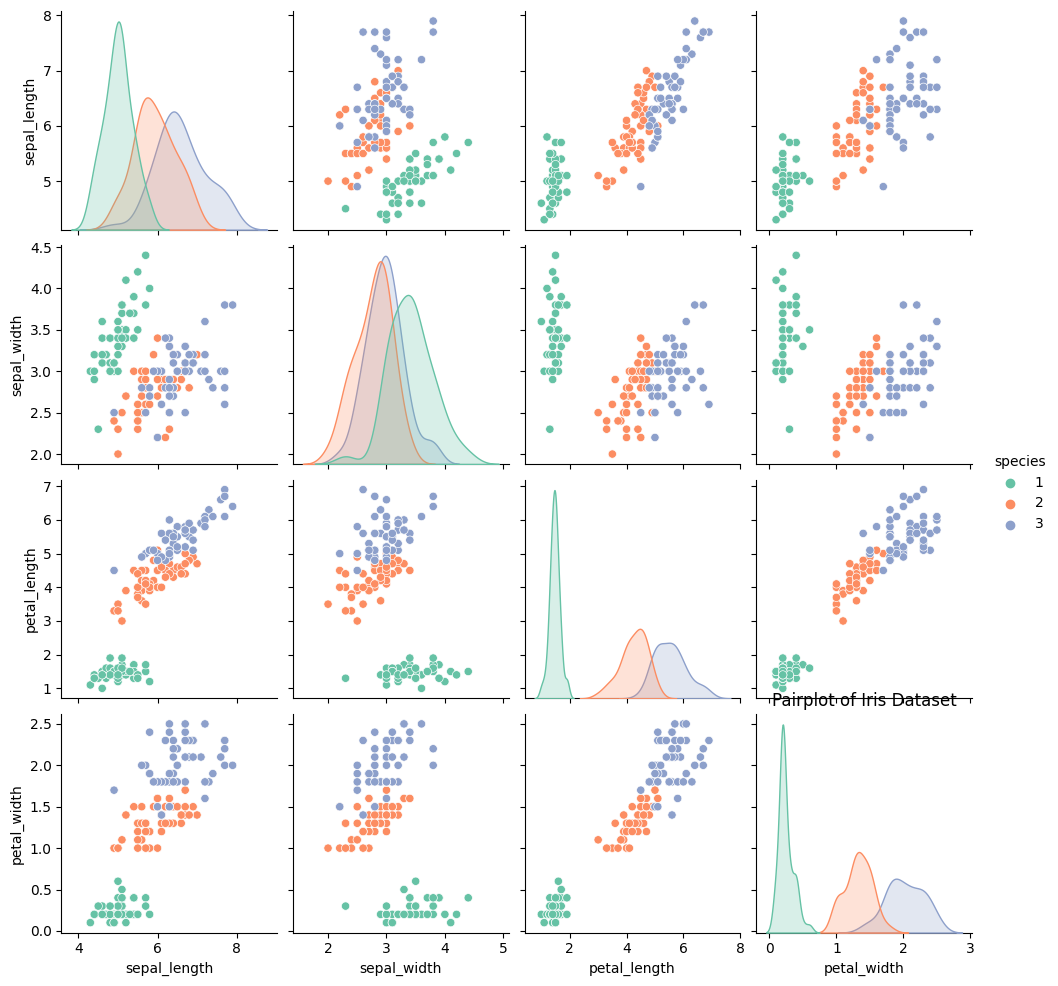

In [51]:
sns.pairplot(df, hue='species', palette='Set2')
plt.title('Pairplot of Iris Dataset')
plt.show()

In [52]:
X = df.drop('species', axis=1)
Y = df['species']

**Splitting data into train and test:**

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

**Create and Train KNN Classifier :**

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [55]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

Actual  Predicted
114       3          3
62        2          2
33        1          1
107       3          3
7         1          1
100       3          3
40        1          1
86        2          2
76        2          2
71        2          2
134       3          3
51        2          2
73        2          2
54        2          2
63        2          3
37        1          1
78        2          2
90        2          2
45        1          1
16        1          1
121       3          3
66        2          2
24        1          1
8         1          1
126       3          3
22        1          1
44        1          1
97        2          2
93        2          2
26        1          1

**Model Evaluation Metrics:**

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

matrix = confusion_matrix(y_test, y_pred)
matrix

report = classification_report(y_test, y_pred)
print(report)

0.9666666666666667
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



**Hyperparameter Tuning :**

In [57]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

# KNN model
model = KNeighborsClassifier()

# Define hyperparameters grid
param_grid = {
    'n_neighbors': range(1, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Define cv stratergy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)

# Get best model
best_model = grid_result.best_estimator_

# predictions
y_pred = best_model.predict(X)

# accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy: %.2f" % accuracy)

# confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# classification report
class_report = classification_report(y, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.98
Confusion Matrix:
 [[493   7]
 [  9 491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       500
           1       0.99      0.98      0.98       500

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

